In [4]:
# import libraries
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas as gpd
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
import contextily as cx

**Preparation of sample graphs**

In [5]:
# Street network data for Bucaramanga, Colombia
# download and save as graphml
G_buc = ox.graph_from_place(
    query = "Bucaramanga, Colombia",
    network_type = "all_private",
    simplify = True,
    retain_all = False,
    truncate_by_edge = False,
    which_result = None,
    buffer_dist = 0,
    clean_periphery = True)
ox.save_graphml(G_buc, "data/G_buc.graphml")

In [6]:
# Street network data for Bunia, DemRep Congo
# download and save as graphml
G_bun = ox.graph_from_place(
    query = "Bunia, Ituri",
    network_type = "all_private",
    simplify = True,
    retain_all = False,
    truncate_by_edge = False,
    which_result = None,
    buffer_dist = 0,
    clean_periphery = True)
ox.save_graphml(G_bun, "data/G_bun.graphml")

**Make world map plot with cities + annotations**

/var/folders/b0/lkvf88hn0673f5dlj9z0_2dr0000gn/T/ipykernel_49881/3345082480.py:18: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


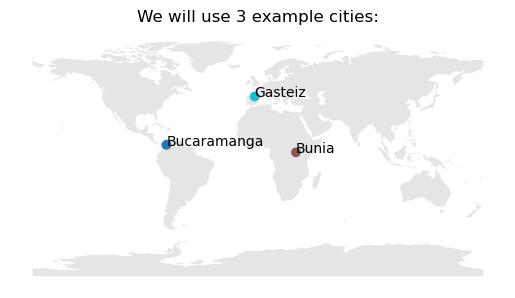

In [7]:
# get city locations
pinpoints = [
    ox.geocode_to_gdf("Bucaramanga, Colombia").geometry[0].representative_point(),
    ox.geocode_to_gdf("Bunia, Ituri").geometry[0].representative_point(),
    ox.geocode_to_gdf("Vitoria-Gasteiz, Spain").geometry[0].representative_point()
]

# make a geodatafame of city locations
pins = gpd.GeoDataFrame(
    {
        "geometry": pinpoints,
        "city": ["Bucaramanga", "Bunia", "Gasteiz"] 
    },
    crs = "EPSG:4326"
)

# get world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# make plot with world + cities + annotation
fig, ax = plt.subplots(1,1)
world.plot(ax=ax, color = "grey", alpha = 0.2)
pins.plot(ax=ax, column = "city")
for _, row in pins.iterrows():
    plt.annotate(
        text=row.city, 
        xy=row.geometry.coords[:][0],
    )
ax.set_axis_off()
ax.set_title("We will use 3 example cities:")
plt.savefig("images/world-cities.png", dpi = 300, bbox_inches = "tight")
#plt.close()